In [4]:
from IPython.display import display, Markdown, Latex

from product import Option
from strategy import *
from euronext import Page, Ticker
from graph import Graph

g=Graph(4800, 5500, 25)

In [5]:
p = Page(ticker=Ticker.CAC1PX, expiry='1-2019')
p.fetch()
options = p.scrap_options()
call = p.call
put = p.put
for k, o in p.call.items():
    o.multiplier=10
for k, o in p.put.items():
    o.multiplier=10


In [3]:
g.display_page_raw(p)

Settl.C,OIC,Day Vol C,Last C,bid C,ask C,C,strike,P,bid P,ask P,Last P,Day Vol P,OIP,Settl.P
625.13,-,-,-,622.20,632.2,C,4400,P,-,1.2,-,-,-,0.62
425.85,-,-,-,423.00,432,C,4600,P,-,1.2,-,-,-,1.34
326.48,-,-,-,323.80,331.8,C,4700,P,0.40,1.6,-,-,2,1.97
228.73,-,-,-,225.20,232.2,C,4800,P,1.50,2.7,-,-,32,4.22
181.64,-,-,-,177.70,183.7,C,4850,P,3.00,4.5,-,-,-,7.14
136.58,-,-,-,131.50,137.5,C,4900,P,6.40,8.9,-,-,15,12.08
-,-,-,-,109.60,115.6,C,4925,P,9.30,11.8,-,-,-,-
95.01,-,-,-,89.30,94.3,C,4950,P,13.30,16.3,-,-,-,20.51
76.22,-,-,-,70.00,75,C,4975,P,19.10,22.1,-,-,-,26.72
59.17,-,-,-,52.90,57.9,C,5000,P,26.20,30.2,-,-,-,34.67


In [ ]:
# test data when interet is fall
import numpy as np
sT = np.arange(4800,5400,25)
o = Option(strike=4900, achat=212.40, vente=219.40, multiplier=10)
c = Option(cat='Call', strike=4900, achat=212.40, vente=219.40, multiplier=10)
p = Option(cat='Put', strike=4900, achat=9.10, vente=11.60, multiplier=10)
print(str(o));print(str(c));print(str(p))

In [ ]:
s2 = Strategy('Strategy : call+2*put long').add(call[4900], 'long', 1).add(call[5300], 'short', 2)
g.profit(call[4950], 'long')
g.profit_strategy(s2)
g.compare(call[5000], 'long', s2, 'long')

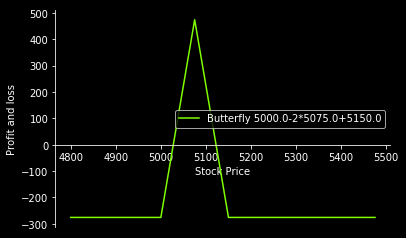

Cost-Butterfly : 276.00€


Category,strike,direction,Quantity,Cost
Call,5000,long,1,647
Call,5075,short,2,-446
Call,5150,long,1,75


In [6]:
butterfly = Butterfly(call[5000], call[5075], call[5150])
g.profit_strategy(butterfly)
print('Cost-Butterfly : {:0.02f}€'.format(butterfly.cost()))
g.display_summary(butterfly)

Ratio : 17.1/1.6 ~ 11
Ratio Backspreads Cost : -5.00€


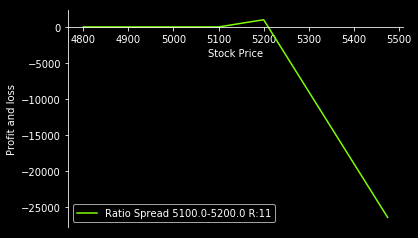

Ratio : 17.1/1.6 ~ 3
Ratio Backspreads Cost : 123.00€


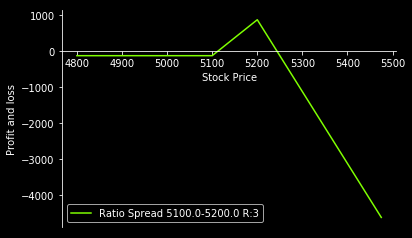

Compare Ratio Backspreads with simple Call long
Ratio Backspreads Cost : 123.00€
Call 5000 Cost : 1429.00€


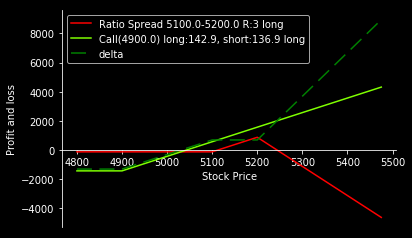

Ratio Spread 5100.0-5200.0 R:11


Category,strike,direction,Quantity,Cost
Call,5100,long,1,171
Call,5200,short,11,-176


Ratio Spread 5100.0-5200.0 R:3


Category,strike,direction,Quantity,Cost
Call,5100,long,1,171
Call,5200,short,3,-48


In [13]:
#ratio-spreads
rspread2 = RatioSpread(call[5100], call[5200])
print('Ratio Backspreads Cost : {:0.02f}€'.format(rspread2.cost()))
g.profit_strategy(rspread2)

ratio_backspreads = RatioSpread(call[5100], call[5200], ratio=3)
print('Ratio Backspreads Cost : {:0.02f}€'.format(ratio_backspreads.cost()))
g.profit_strategy(ratio_backspreads)

print('Compare Ratio Backspreads with simple Call long')
print('Ratio Backspreads Cost : {:0.02f}€'.format(ratio_backspreads.cost()))
print('Call 5000 Cost : {:0.02f}€'.format(call[4900].cost('long')))
g.compare(ratio_backspreads, 'long', call[4900], 'long')

print(rspread2.label)
g.display_summary(rspread2)
print(ratio_backspreads.label)
g.display_summary(ratio_backspreads)

Straddle Cost : -451.0


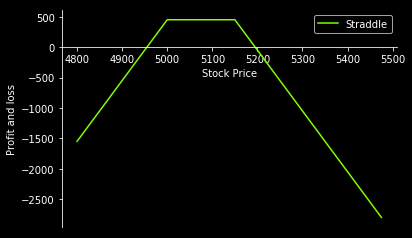

{'min': -2799.0, 'max': 451.0, 'cost': -451.0}
Compare Straddle with simple Put short
Straddle Cost : -451.00€
Put 5000 Cost : -446.00€


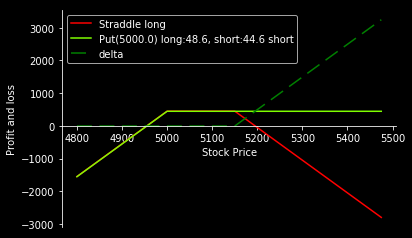

Category,strike,direction,Quantity,Cost
Call,5150,short,1,-5
Put,5000,short,1,-446


In [8]:
straddle = (Strategy('Straddle')
            .add(call[5150], 'short', 1)
            .add(put[5000], 'short', 1)
           )
print('Straddle Cost : {}'.format(straddle.cost()))
g.profit_strategy(straddle)
stats = {'min': min(straddle.payoff(g.sT, 'long')),
         'max': max(straddle.payoff(g.sT, 'long')),
         'cost': straddle.cost()}
print(stats)

print('Compare Straddle with simple Put short')
print('Straddle Cost : {:0.02f}€'.format(straddle.cost()))
print('Put 5000 Cost : {:0.02f}€'.format(put[5000].cost('short')))
g.compare(straddle, 'long', put[5000], 'short')
g.display_summary(straddle)


In [ ]:
strat1 = (Strategy('Stratis 5100-..-5300 croissant')
          .add(put[5000], 'short', 3)
          .add(put[5100], 'short', 2)
          .add(put[5200], 'short', 1)
        )
strat2 = (Strategy('Stratis 5100-..-5300 decroissant')
             .add(put[5000], 'short', 1)
             .add(put[5100], 'short', 2)
             .add(put[5200], 'short', 3)
        )
print('{} Cost : {}'.format(strat1.label, strat1.cost()))
stats = {'min': min(strat1.payoff(g.sT, 'long')),
         'max': max(strat1.payoff(g.sT, 'long')),
         'cost': strat1.cost()}
print(stats)
print('{} Cost : {}'.format(strat2.label, strat2.cost()))
g.profit_strategy(strat1)
g.profit_strategy(strat2)
g.compare(strat1, 'long', strat2, 'long')

## Box Spread 5000.0-5150.0

Box Spread 5000.0-5150.0 Cost : 868.0


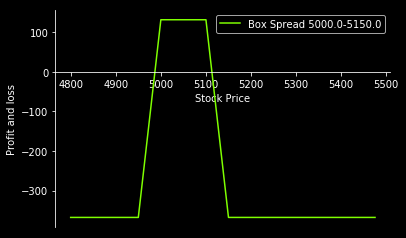

Category,strike,direction,Quantity,Cost
Call,5000,short,1,-260
Call,4950,long,1,591
Put,5100,short,1,-1190
Put,5150,long,1,1727


## Box Spread 5000.0-5150.0

Box Spread 5000.0-5150.0 Cost : 1667.0


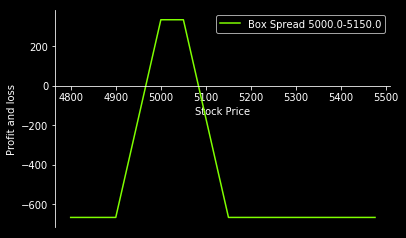

Category,strike,direction,Quantity,Cost
Call,5000,short,1,-260
Call,4900,long,1,970
Put,5050,short,1,-770
Put,5150,long,1,1727


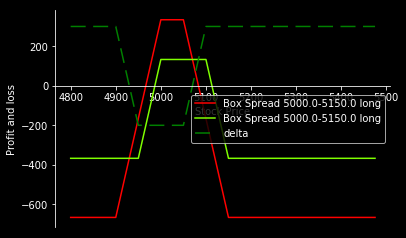

In [9]:
bspread2 = BoxSpread(call[5000], call[4900], put[5050], put[5150])
bspread1 = BoxSpread(call[5000], call[4950], put[5100], put[5150])

display(Markdown('## {}'.format(bspread1.label)))
print('{} Cost : {}'.format(bspread1.label, bspread1.cost()))
g.profit_strategy(bspread1)
g.display_summary(bspread1)

display(Markdown('## {}'.format(bspread2.label)))
print('{} Cost : {}'.format(bspread2.label, bspread2.cost()))
g.profit_strategy(bspread2)
g.display_summary(bspread2)

g.compare(bspread2, 'long', bspread1, 'long')


Call Spread 5000.0-5150.0 Cost : 295.0
Call Spread 4900.0-5100.0 Cost : 943.0


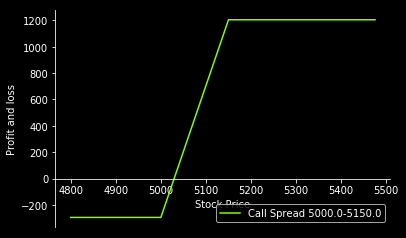

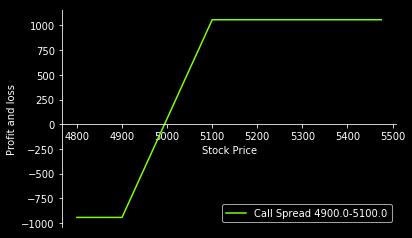

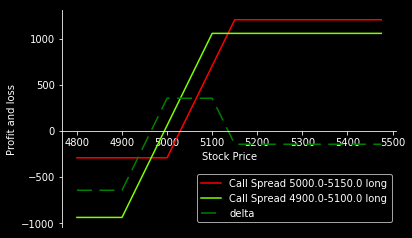

In [10]:
cspread1 = CallSpread(call[5000], call[5150])
print('{} Cost : {}'.format(cspread1.label, cspread1.cost()))
cspread2 = CallSpread(call[4900], call[5100])
print('{} Cost : {}'.format(cspread2.label, cspread2.cost()))
g.profit_strategy(cspread1)
g.profit_strategy(cspread2)
g.compare(cspread1, 'long', cspread2, 'long')

Put Spread 5150.0-5000.0 Cost : 1281.0


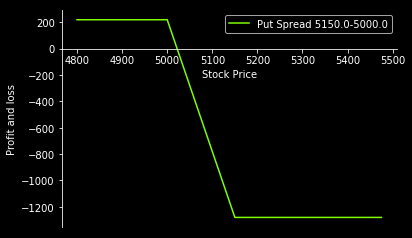

Put Spread 5150.0-5100.0 Cost : 537.0


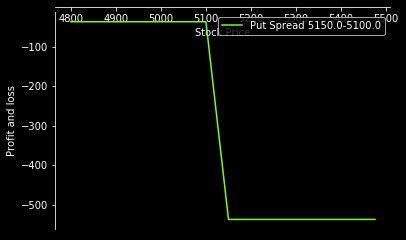

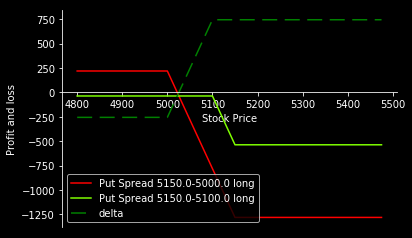

In [11]:
pspread1 = PutSpread(put[5150], put[5000])
print('{} Cost : {}'.format(pspread1.label, pspread1.cost()))
g.profit_strategy(pspread1)
pspread2 = PutSpread(put[5150], put[5100])
print('{} Cost : {}'.format(pspread2.label, pspread2.cost()))
g.profit_strategy(pspread2)
g.compare(pspread1, 'long', pspread2, 'long')

In [ ]:
ironcondor = IronCondor(put[5050], put[5000], call[5150], call[5200])
print('{} Cost : {}'.format(ironcondor.label, ironcondor.cost()))
risk = min(ironcondor.payoff(g.sT, 'long'))
print('{} Risk : {}'.format(ironcondor.label,risk))
g.profit_strategy(ironcondor)
g.display_summary(ironcondor)

ironcondor = IronCondor(put[5000], put[4950], call[5150], call[5200])
print('{} Cost : {}'.format(ironcondor.label, ironcondor.cost()))
risk = min(ironcondor.payoff(g.sT, 'long'))
print('{} Risk : {}'.format(ironcondor.label,risk))
g.profit_strategy(ironcondor)
g.display_summary(ironcondor)

In [ ]:
help(IronCondor)

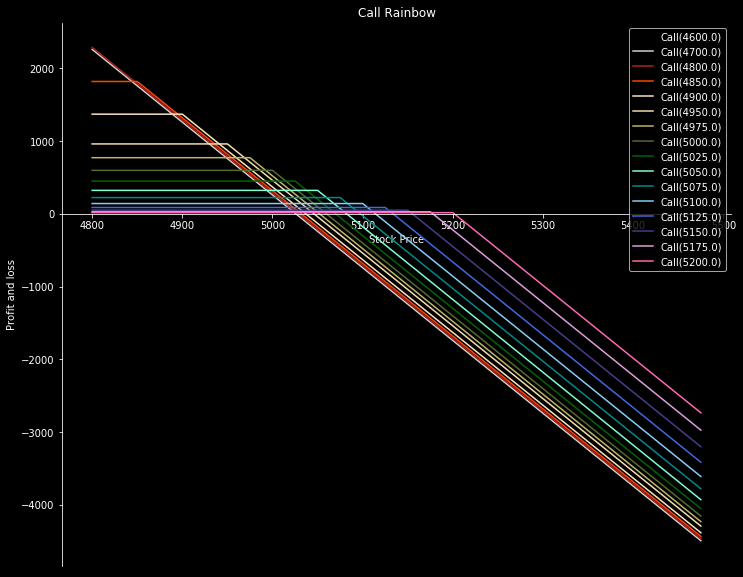

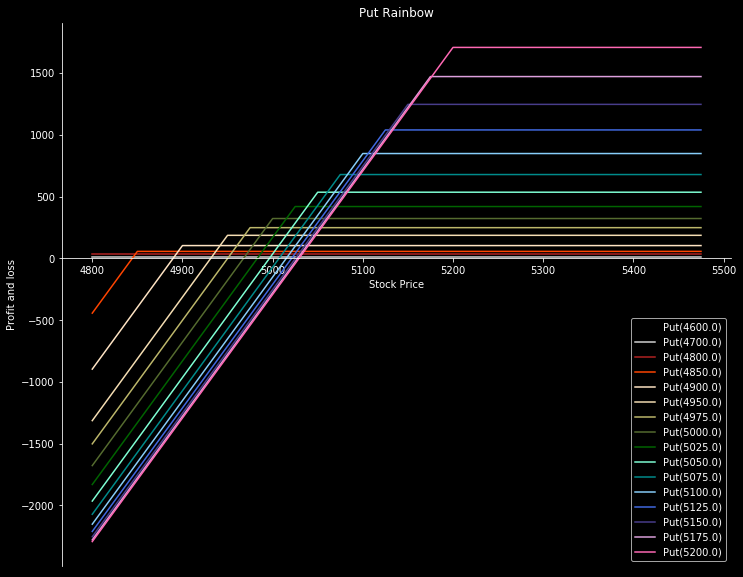

In [8]:
g.profit_rainbow(call.values(), 'short', title='Call Rainbow')
g.profit_rainbow(put.values(), 'short', title='Put Rainbow')

In [ ]:
call

In [ ]:
def Butterfly(call_low, call_middle, call_high, label=None):
    label = ('Butterfly {}-2*{}+{}'
             .format(call_low.strike,
                     call_middle.strike,
                     call_high.strike)
            if not label else label)
    butterfly = (Strategy(label)
                 .add(call_low, 'long', 1)
                 .add(call_middle, 'short', 2)
                 .add(call_high, 'long', 1))
    return butterfly

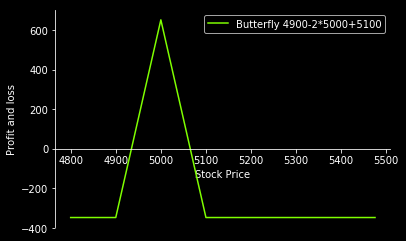

Cost-Butterfly : 348.00€
{'min': -348.0, 'max': 652.0000000000001, 'cost': 348.0}


Category,strike,direction,Quantity,Cost
Call,4900,long,1,1742
Call,5000,short,2,-1606
Call,5100,long,1,212


{'payoff_low': -490.0000000000017, 'payoff_middle': 1102.0000000000036, 'payoff_high': -212.0}
400.00000000000193


In [7]:
call_low = Option(cat='Call', strike=4900, achat=174.2, vente=0, multiplier=10)
call_middle = Option(cat='Call', strike=5000, achat=0, vente=80.3, multiplier=10)
call_high = Option(cat='Call', strike=5100, achat=21.2, vente=0, multiplier=10)
butterfly = Butterfly(call_low, call_middle, call_high)
g.profit_strategy(butterfly)
print('Cost-Butterfly : {:0.02f}€'.format(butterfly.cost()))
stats = {'min': min(butterfly.payoff(g.sT, 'long')),
         'max': max(butterfly.payoff(g.sT, 'long')),
         'cost': butterfly.cost()}
print(stats)
g.display_summary(butterfly)
cac=5025.20
payoff = {'payoff_low': (cac - 4900 - 174.2) * 10,
          'payoff_middle': 2 * (80.3 - (cac - 5000)) * 10,
          'payoff_high': -21.2 * 10}
print('{}'.format(payoff))
print('{}'.format(sum(v for v in payoff.values())))